# 逻辑回归

求得事件概率值,一般用作二分类

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(t:int):
    return 1 / (1 + np.exp( -t )) 

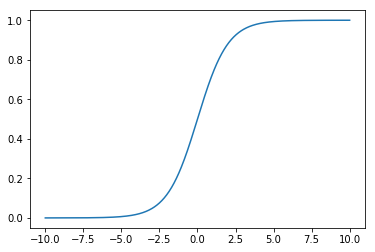

In [3]:
x = np.linspace(-10, 10, 500)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

In [4]:
from MachineLearning.LogisticRegression import LogisticRegression

In [147]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [154]:
X = X[np.array(y > 0, dtype = int)+np.array(y < 3, dtype = int) == 2]
y = y[np.array(y > 0, dtype = int)+np.array(y < 3, dtype = int) == 2]
y = np.array(y == 1, dtype = int)

In [155]:
X.shape

(100, 4)

In [157]:
regression = LogisticRegression()

In [158]:
from sklearn.model_selection import train_test_split

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80)

In [237]:
X_train.shape

(20, 4)

In [238]:
X_test.shape

(80, 4)

In [239]:
regression.fit(X_train, y_train)

In [240]:
regression.score(X_test, y_test)

0.9

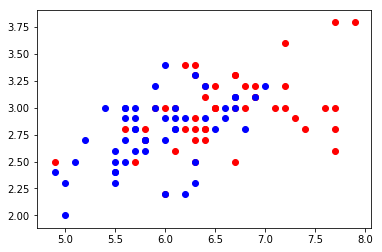

In [243]:
plt.scatter(X[y == 0,0],X[y == 0,1],color = "red")
plt.scatter(X[y == 1,0],X[y == 1,1],color = "blue")
plt.show()

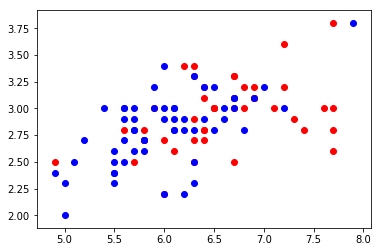

In [244]:
predict_y = regression.predict(X)
plt.scatter(X[predict_y == 0,0],X[predict_y == 0,1],color = "red")
plt.scatter(X[predict_y == 1,0],X[predict_y == 1,1],color = "blue")
plt.show()

In [242]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8875

In [247]:
X = np.random.normal(0, 1, size = (200, 2))
y = np.array(X[:,0] ** 2 + X[:,1]**2 < 0.5, dtype= int)

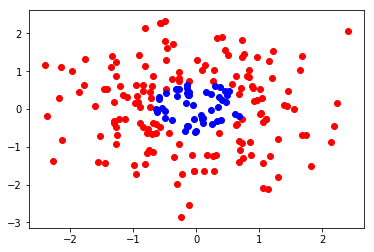

In [252]:
plt.scatter(X[y == 0,0],X[y == 0,1],color = "red")
plt.scatter(X[y == 1,0],X[y == 1,1],color = "blue")
plt.show()

In [260]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
poly.fit(X)
trans_X = poly.transform(X)

In [261]:
regression = LogisticRegression()

In [266]:
X_train, X_test, y_train,y_test = train_test_split(trans_X, y)
regression.fit(X_train, y_train)
regression.score(X_test, y_test)

1.0

# sklearn中的逻辑回归

In [334]:
import numpy as np
import matplotlib.pyplot as plt
X = np.random.normal(0,1,size = (500,2))
y = np.array(X[:,0] ** 2 + X[:,1] < 1.5, dtype = int)
for _ in range(40):
    y[np.random.randint(200)] = 1

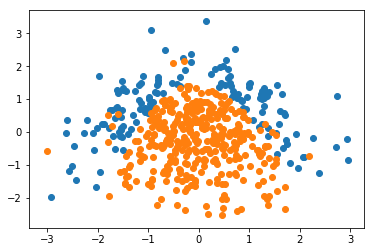

In [335]:
plt.scatter(X[y == 0,0], X[y == 0,1])
plt.scatter(X[y == 1,0], X[y == 1,1])
plt.show()

In [336]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolyLogisticRegression(degree,C):
    return Pipeline([
        ("Poly",PolynomialFeatures(degree = degree)),
        ("Standard", StandardScaler()),
        ("logistic", LogisticRegression(C = C,solver = "lbfgs"))
    ])

In [337]:
poly_log = PolyLogisticRegression(20,1000)
poly_log.fit(X_train, y_train)
poly_log.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.936

# OVO OVR

In [359]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [361]:
log_reg =  Pipeline([
        ("Poly",PolynomialFeatures(degree = 20)),
        ("Standard", StandardScaler()),
        ("logistic", LogisticRegression(multi_class = "multinomial",solver = "newton-cg"))
    ])
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9736842105263158

# OVO OVR sklearn

In [363]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(LogisticRegression())
ovr.fit(X_train,y_train)
ovr.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9473684210526315

In [364]:
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(LogisticRegression())
ovo.fit(X_train,y_train)
ovo.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9736842105263158